## Задача 8. Вычисление интегралов методом Монте-Карло

Эта задача посвящена вычислению определённых интегралов методом Монте-Карло. Рекомендуем ознакомиться с полным текстом условия по ссылке на Вики.

Для оформления решения вы можете
* либо воспользоваться данным шаблоном, дополнив его текстовыми комментариями и кодом на языке Python,
* либо оформить решение текстом (как раньше, в печатном виде) и приложить к нему код на языке C++, снабжённый комментариями.

В первом случае (Python) все необходимые теоретические пояснения и расчёты делайте в этом файле.

Формат Jupyter-ноутбука, которым предлагается воспользоваться для решения задачи, содержит два вида ячеек: текстовые (позволяющие писать текст в формате Markdown) и кодовые (позволяющие писать код на языке Python). Ячейки с кодом можно запускать в любом порядке, при этом в следующих запусках доступны переменные, определённые на предыдущих запусках. Рекомендуется располагать ячейки с кодом таким образом, чтобы их можно (и нужно) было запускать последовательно. В текстовых ячейках можно писать формулы на LaTeX. С Jupyter-ноутбуком можно работать, например, на локальных ресурсах в Visual Studio Code или в PyCharm или на удалённых ресурсах в Google Colab.

Часть "технического" кода уже написана за вас. Предполагается, что изменять её вы не будете, однако это не запрещено. В ячейках будут использоваться функции из библиотек `numpy` и `scipy`, документация гуглится по первой ссылке.

С вопросами/претензиями/проблемами по шаблону пишите в общий чат или [Владу](https://t.me/temporary_nickname). С вопросами по использованию Python пишите в общий чат. С другими вопросами пишите ассистентам или в общий чат, если вопросы не содержат спойлеров к решению.

Успехов!

In [19]:
import numpy as np
import scipy
import scipy.stats as spstats
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

### Посчитаем интеграл вручную (почти)

Во всех вариантах предлагается вычислить интеграл следующего вида:
$$\int_a^b \dfrac{1}{\sigma\sqrt{2\pi}}\exp\left(-\dfrac{(x-m)^2}{2\sigma^2}\right)dx.$$
Что-то напоминает, не правда ли?

Поймите, какая у этого интеграла вероятностная интерпретация, и выразите его значение через функцию Лапласа.

Этот интеграл представляет собой вероятность, что СВ X примет значение в интервале [a; b].
Через функцию Лапласа он вырадается следующим образом:
$ P(a \leq X \leq b) = \int_{a}^{b} \frac{1}{\sigma \sqrt{2\pi}} \exp \left( -\frac{(x - m)^2}{2\sigma^2} \right) dx = Ф(\frac{b - m}{\sigma}) - Ф(\frac{a - m}{\sigma})$


Вычислите значение этого интеграла, используя функцию `spstats.norm.cdf` для получения значений функции Лапласа $\Phi(x)$.

In [20]:
int_true = spstats.norm.cdf((7 - 5)/2) - spstats.norm.cdf((4 - 5)/2)
print(int_true)

0.532807207342556


Запрограммируйте подынтегральную функцию, соответствующую вашему варианту, и впишите в ячейку её формулу с параметрами из вашего варианта:
$$f(x) = ...$$

In [21]:
def f(x):
    return (1/(2 * np.sqrt(2 * np.pi))) * np.exp(-((x - 5) ** 2 )/ (2 * 4))

print(f(4))
print(f(5))
print(f(6))
print(f(7))

0.17603266338214976
0.19947114020071635
0.17603266338214976
0.12098536225957168


### Метод Монте-Карло

Опишите вычисление интеграла $$\int_a^b f(x)dx$$ методом Монте-Карло, опираясь на положения теории вероятностей.

Для подсчёта интеграла методом Монте-Карло для начала генерируем $N$ случайных точек из отрезка $[a;b]$. Для всех них вычисляем $f(x_i)$ и находим среднее арифметическое, то есть $\frac{1}{N} \sum_{i = 0}^N f(x_i)$. И чтобы вычислить оценку интеграла, домножим на $(b - a)$.

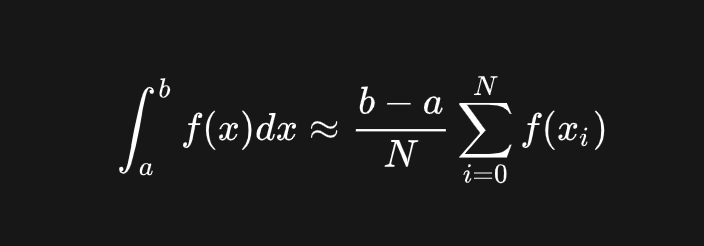

Напишите функцию, вычисляющую интеграл
$$\int_a^b f(x)dx$$
методом Монте-Карло с $n$ испытаниями.

Для генерации случайных чисел из равномерного распределения воспользуйтесь функцией `np.random.uniform`.

In [22]:
def monte_carlo_integrate(f, a, b, n):
    '''
    Вычисляет интеграл функции f в пределах от a до b методом Монте-Карло с n испытаниями.
    '''
    summ = 0;
    for i in range(0, n):
      num = np.random.uniform(a, b);
      summ += f(num)
    count_integral = ((b - a) / n) * summ
    return count_integral

print(monte_carlo_integrate(f, 4, 7, 10000))

0.5331081724442821


### Метод прямоугольников/трапеций

Вспомним, что определённый интеграл Римана определяется как предел интегральных сумм:
$$\int_a^b f(x)dx = \lim_{\Delta \to 0} \sum_{i=1}^{m} f(\xi_i)(\xi_i - \xi_{i-1}), \text{ где } \Delta = \max_{1 \leqslant i \leqslant m} (\xi_i - \xi_{i-1}).$$
Напишите функцию, которая аппроксимирует определённый интеграл интегральной суммой, отвечающей разбиению отрезка $[a,b]$ на $m$ равных частей:
$$\xi_i = a + i\dfrac{b-a}{m}; \ \ \Delta = \dfrac{b-a}{m}.$$
Вместо формулы выше, приводящей к "методу правых прямоугольников", вы также можете использовать [метод левых или средних прямоугольников](https://ru.wikipedia.org/wiki/Метод_прямоугольников) или [метод трапеций](https://ru.wikipedia.org/wiki/Метод_трапеций).

In [23]:
def quad_integrate(f, a, b, m):
    '''
    Вычисляет интеграл функции f в пределах от a до b методом трапеций/прямоугольников с разбиением на m равных отрезков.
    '''
    xis = np.linspace(start=a, stop=b, num=m+1) # массив xi_0, ..., xi_m
    summ = 0
    delta = (b - a) / m
    for i in range(1, m + 1):
      tetai = a + i * ((b - a) / m)
      summ += f(tetai) * delta
    return summ

print(quad_integrate(f, 4, 7, 100000))

0.532806381625203


### Расчёт количества испытаний в методе Монте-Карло

Выберите такое количество испытаний $n$ в методе Монте-Карло, чтобы можно было с вероятностью $p = \{\text{значение из вашего варианта}\}$ гарантировать, что абсолютное значение ошибки не превысит $\Delta = \{\text{значение из вашего варианта}\}$.

Ф$(\frac{1 + 0.98}{2})$ - это квантиль стандартного нормального распределения для вероятности 0.98.

$C$ - это максимальное значение функции.

$ P (| I - \hat{I} | < Δ) = 2\cdot Ф(Δ \cdot \frac{\sqrt{n}}{C}) = 0.98$

$ 2\cdotФ (0.01 \cdot \frac{\sqrt{n}}{C}) = 0.98$

$ Ф (0.01 \cdot \frac{\sqrt{n}}{C}) = 0.49$

$ 0.01 \cdot \frac{\sqrt{n}}{C} =$ Ф$(\frac{1 + 0.98}{2})$

$ n = (\frac{Ф(\frac{1 + 0.98}{2}) \cdot С}{0.01}) ^ 2$


Интеграл, возникающий при подсчёте дисперсии $\mathbb D[f(\xi)]$, можете
* либо честно взять вручную и выразить значение через функцию Лапласа,
* либо оценить (сверху или снизу?) (чем?) - никто же не просит найти наименьшее количество испытаний :)

Для вычислений можно (и нужно) использовать код, но все используемые формулы должны быть записаны в текстовой ячейке.

Для получения значений функции Лапласа используйте функцию `spstats.norm.cdf`, для получения квантилей стандартного гауссовского распределения - функцию `spstats.norm.ppf`.

In [24]:
delta = 0.01

C = f(5)

quantile = spstats.norm.ppf(0.99)

print(spstats.norm.ppf(0.99))

n = (quantile * C / delta) ** 2
print(n)

2.3263478740408408
2153.3243754844966


### Применим полученные результаты

Вычислите значение интеграла методом Монте-Карло с $n$ испытаниями (где $n$ вычислено вами выше), используя функцию `monte_carlo_integrate`. Вычислите ошибку как модуль разности между полученным значением и истинным значением интеграла (которое вы рассчитали выше через функцию Лапласа). Не превышает ли ошибка $\Delta$? Прокомментируйте полученные результаты.

In [25]:
monte_carlo_count = monte_carlo_integrate(f, 4, 7, 2153)
difference = np.abs(monte_carlo_count - int_true)
print("Полученное значение: ", monte_carlo_count, " Истинное значение интеграла: ",  int_true, " Ошибка: ", difference)

Полученное значение:  0.5355641109400923  Истинное значение интеграла:  0.532807207342556  Ошибка:  0.00275690359753622


Как видно из результатов, разница между полученным значением и истинным значением интеграла никогда не превосходит дельту, поэтому можно утверждать, что функция работает корректно.

Для приличия посчитайте интеграл ещё и с помощью функции `quad_integrate` - не зря же вы её писали. Заодно убедитесь, что она работает. Параметр $m$ подберите по своему вкусу.

In [26]:
quad_int_res = quad_integrate(f, 4, 7, 2153)
diff = np.abs(quad_int_res - int_true)
print(quad_int_res)
print(diff)

0.5327688388545501
3.8368488005979806e-05


### Посмотрим на графики

Давайте посмотрим, как меняется погрешность вычисления интеграла двумя рассмотренными методами с ростом параметра (в одном случае - количество испытаний, в другом - количество частей, на которое делится отрезок).

Запустите ячейки ниже и посмотрите на графики. Для наглядности вы можете менять диапазоны, меняя аргументы у функции `np.arange`. Обратите внимание на время работы циклов, в которых происходит вычисление интегралов (указано рядом с прогресс-баром в выводе ячейки).

Прокомментируйте увиденное, сравнив ошибку интегрирования и время работы программы в двух методах. Опишите преимущества и недостатки метода Монте-Карло для вычисления определённых интегралов.

In [27]:
a = 4 # впишите значение a
b = 7 # впишите значение b

100%|██████████| 100/100 [00:16<00:00,  6.06it/s]


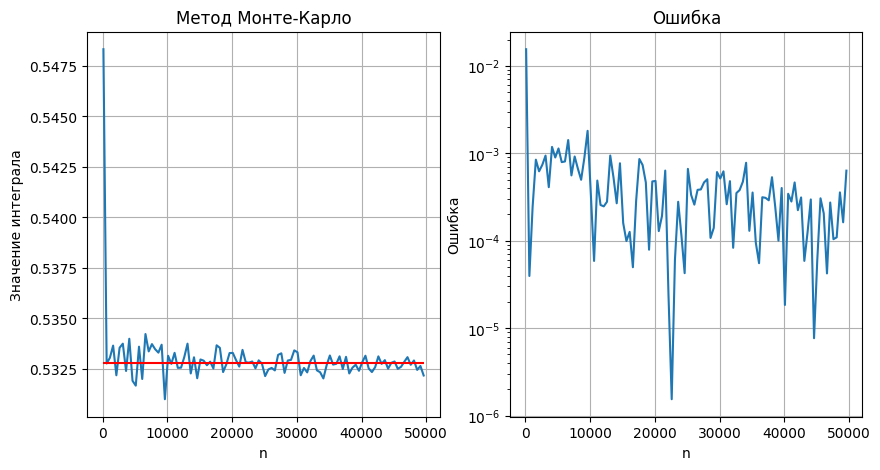

In [16]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# потыкайте здесь разные диапазоны
ns = np.arange(100, 50000, 500).astype("int64")
res_mc = np.zeros([len(ns)])
for i in tqdm.tqdm(np.arange(len(ns))): # tqdm - штуковина для отрисовки прогресс-бара
    res_mc[i] = monte_carlo_integrate(f, a, b, ns[i])

ax1.set_title("Метод Монте-Карло")
ax1.set_xlabel("n")
ax1.set_ylabel("Значение интеграла")
#ax.set_yscale("log") # для лучшей различимости быстро убывающих вещей
ax1.grid()
ax1.plot(ns, res_mc)
ax1.hlines(y=int_true, xmin=ns[0], xmax=ns[-1], colors="red")

ax2.set_title("Ошибка")
ax2.set_xlabel("n")
ax2.set_ylabel("Ошибка")
ax2.set_yscale("log") # для лучшей различимости быстро убывающих вещей
ax2.grid()
ax2.plot(ns, abs(res_mc - int_true))

plt.show()

100%|██████████| 100/100 [00:08<00:00, 11.26it/s]


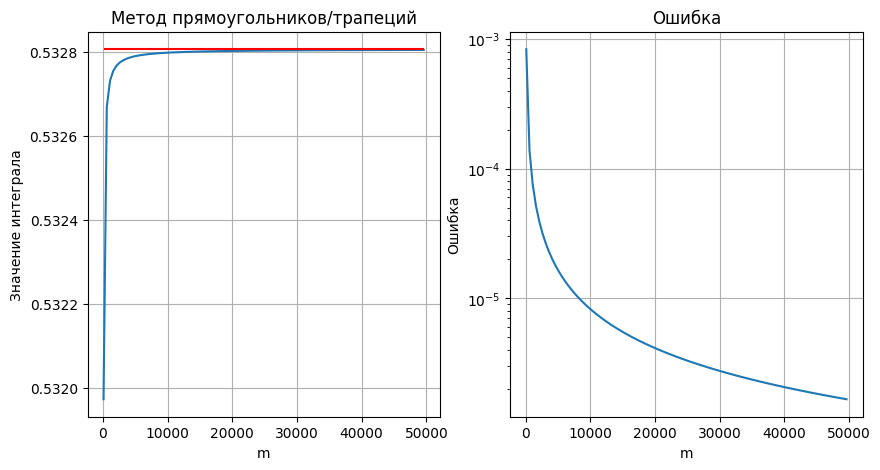

In [17]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# и здесь потыкайте разные диапазоны
ms = np.arange(100, 50000, 500).astype("int64")
res_quad = np.zeros([len(ms)])
for i in tqdm.tqdm(np.arange(len(ms))):
    res_quad[i] = quad_integrate(f, a, b, ms[i])

ax1.set_title("Метод прямоугольников/трапеций")
ax1.set_xlabel("m")
ax1.set_ylabel("Значение интеграла")
#ax.set_yscale("log")
ax1.grid()
ax1.plot(ms, res_quad)
ax1.hlines(y=int_true, xmin=ms[0], xmax=ms[-1], colors="red")

ax2.set_title("Ошибка")
ax2.set_xlabel("m")
ax2.set_ylabel("Ошибка")
ax2.set_yscale("log")
ax2.grid()
ax2.plot(ms, abs(res_quad - int_true))

plt.show()

Как можно заметить, метод прямоугольников/трапеций вычисляет быстрее, чем метод Монте-Карло. Также у метода прямоугольников значение с определённого момента фиксированное, а ошибка становится всё меньше и меньше. Что же касается метода Монте-Карло, то здесь всё менее однозначно. Значения бегают у правильного, а ошибка прыгает из большой в маленькую. Честно говоря, лично я бы отдал предпочтение метод прямоугольников, так как он точнее.